# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
         
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bonthe
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | pont rouge
Processing Record 4 of Set 1 | cangucu
Processing Record 5 of Set 1 | sagua la grande
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | rongelap
Processing Record 13 of Set 1 | tralee
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | banjarmasin
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | cadiz
Processing Record 19 of Set 1 | hastings
Processing Record 20 of Set 1 | nabire
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | vilyuysk
Processing Record 2

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bonthe,7.5264,-12.5050,26.12,81,78,2.59,SL,1700953168
1,nemuro,43.3236,145.5750,-0.76,66,23,7.86,JP,1700953168
2,pont rouge,48.8833,-72.0825,-3.84,81,98,5.61,CA,1700953169
3,cangucu,-31.3950,-52.6756,17.56,88,85,2.76,BR,1700953169
4,sagua la grande,22.8067,-80.0756,24.12,84,20,4.07,CU,1700953169


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bonthe,7.5264,-12.5050,26.12,81,78,2.59,SL,1700953168
1,nemuro,43.3236,145.5750,-0.76,66,23,7.86,JP,1700953168
2,pont rouge,48.8833,-72.0825,-3.84,81,98,5.61,CA,1700953169
3,cangucu,-31.3950,-52.6756,17.56,88,85,2.76,BR,1700953169
4,sagua la grande,22.8067,-80.0756,24.12,84,20,4.07,CU,1700953169


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

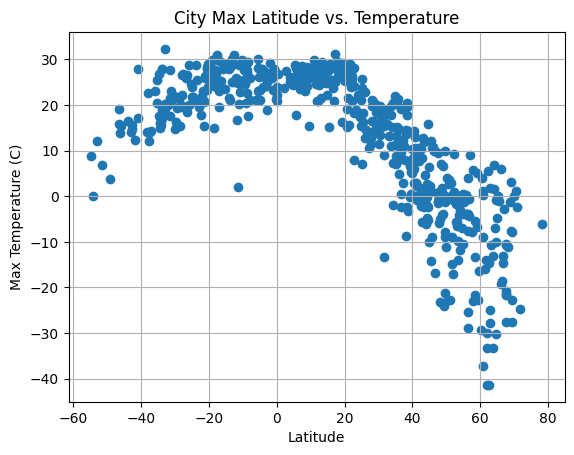

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

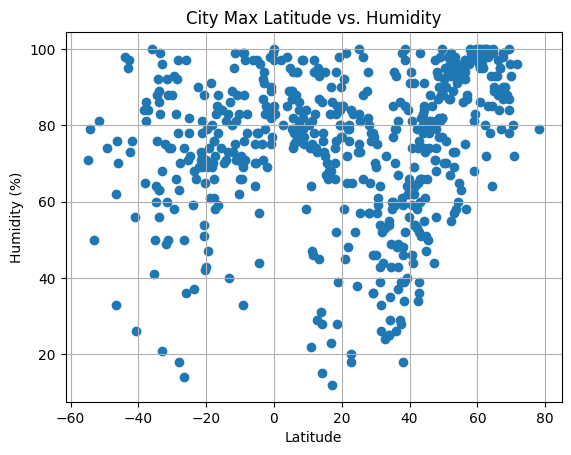

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

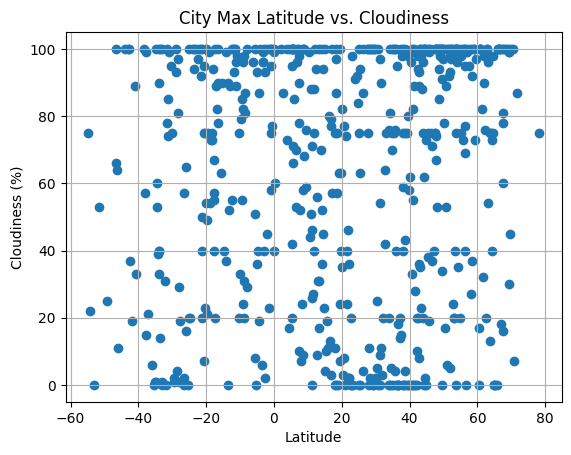

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

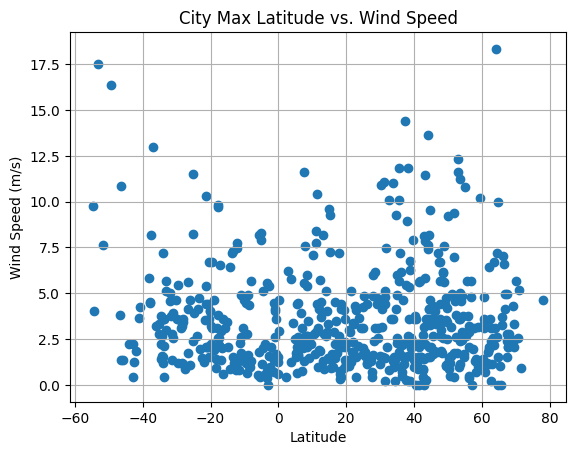

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def lr_function(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bonthe,7.5264,-12.5050,26.12,81,78,2.59,SL,1700953168
1,nemuro,43.3236,145.5750,-0.76,66,23,7.86,JP,1700953168
2,pont rouge,48.8833,-72.0825,-3.84,81,98,5.61,CA,1700953169
4,sagua la grande,22.8067,-80.0756,24.12,84,20,4.07,CU,1700953169
10,longyearbyen,78.2186,15.6401,-6.09,79,75,4.63,SJ,1700953171


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cangucu,-31.3950,-52.6756,17.56,88,85,2.76,BR,1700953169
5,waitangi,-43.9535,-176.5597,16.57,98,100,2.24,NZ,1700953169
6,adamstown,-25.0660,-130.1015,21.74,82,100,11.48,PN,1700953170
7,puerto baquerizo moreno,-0.9000,-89.6000,26.55,89,75,4.12,EC,1700953170
8,punta arenas,-53.1500,-70.9167,12.06,50,0,17.49,CL,1700953124


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8556298481678767


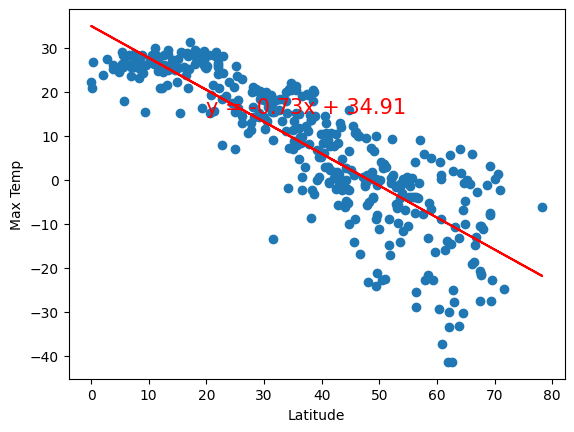

In [25]:
# Linear regression on Northern Hemisphere
y_values = northern_hemi_df["Max Temp"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-squared is: 0.6025413754547727


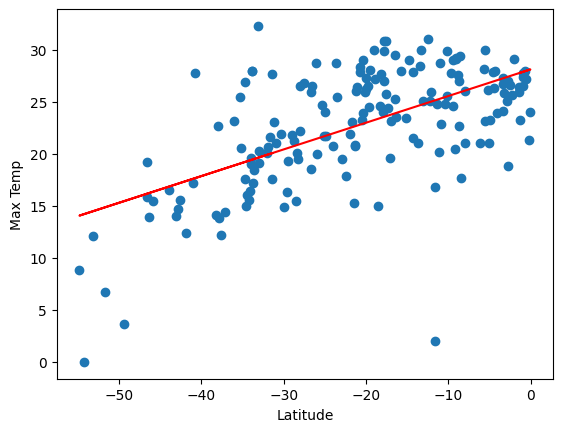

In [26]:
# Linear regression on Southern Hemisphere
y_values = southern_hemi_df["Max Temp"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, as one moves away from the equator (towards higher latitudes), temperatures tend to decrease moderately. However, in the southern hemisphere, this correlation is slightly more moderate and leans towards being positive. This suggests that while there is still a tendency for temperatures to decrease with distance from the equator in the southern hemisphere, the correlation is not as strong as in the northern hemisphere and might even show occasional instances where temperatures increase slightly with higher latitudes.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.24245416370517048


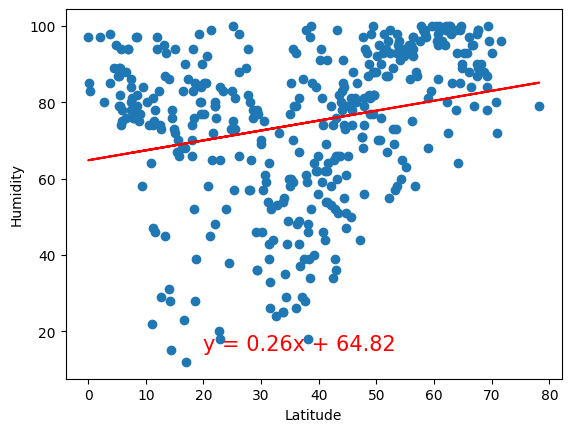

In [27]:
# Northern Hemisphere
y_values = northern_hemi_df["Humidity"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: 0.20622643695599546


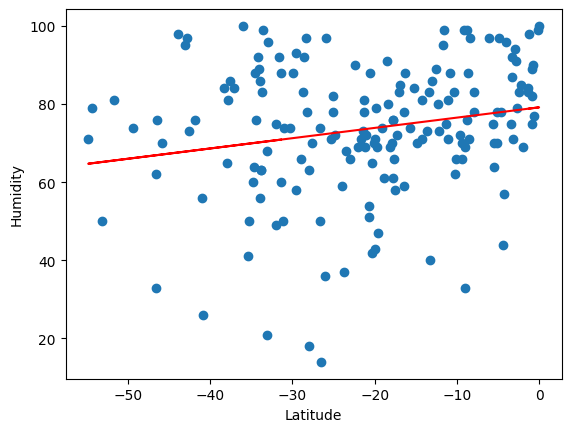

In [28]:
# Southern Hemisphere
y_values = southern_hemi_df["Humidity"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** There's a notably weak relationship between humidity and latitude in both the northern and southern hemispheres. This means that as you move away from or toward the equator (changing latitudes), there's very little change or association observed in humidity levels. Despite the geographical location—whether closer to the poles or the equator—the correlation between latitude and humidity remains so minimal that it's hardly perceptible or significant. This lack of correlation suggests that latitude alone might not be a significant factor influencing humidity levels in these regions. Other variables or factors could have a more dominant influence on humidity in these areas.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.13704785922221827


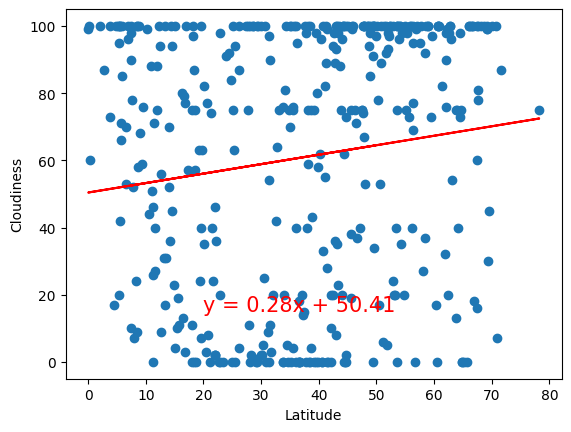

In [29]:
# Northern Hemisphere
y_values = northern_hemi_df["Cloudiness"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: 0.2002193755671683


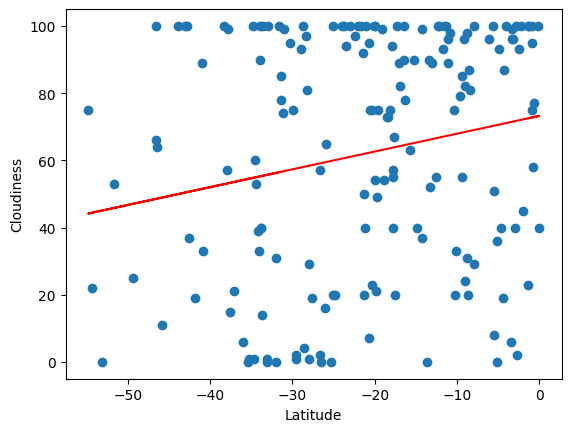

In [30]:
# Southern Hemisphere
y_values = southern_hemi_df["Cloudiness"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** In the southern hemisphere, there's a slightly stronger negative correlation between latitude and cloudiness. This suggests that as you move away from the equator towards higher latitudes in the southern hemisphere, there tends to be a somewhat greater decrease in cloudiness, although this relationship is still relatively subtle or modest.

Conversely, in the northern hemisphere, the correlation between latitude and cloudiness is weak. This indicates that changes in latitude within the northern hemisphere do not strongly correspond to changes in cloudiness. Cloudiness levels might not significantly vary as one moves from lower to higher latitudes in the northern hemisphere, or if there is a pattern, it's not distinct enough to establish a robust correlation between latitude and cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04452515352466227


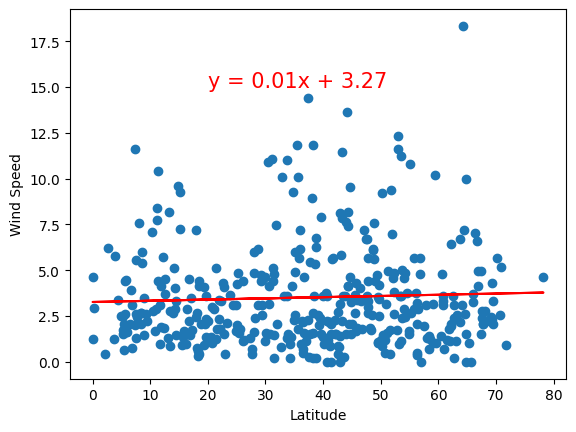

In [31]:
# Northern Hemisphere
y_values = northern_hemi_df["Wind Speed"]
x_values = northern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

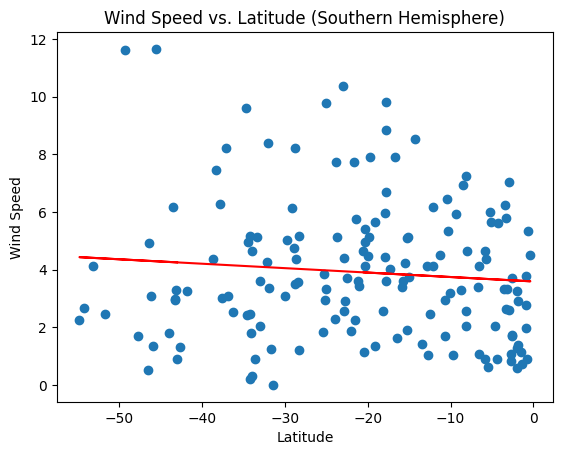

In [ ]:
# Southern Hemisphere
y_values = southern_hemi_df["Wind Speed"]
x_values = southern_hemi_df["Lat"]
lr_function(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres, there isn't a strong or noticeable relationship between latitude and wind speed. This means that as you move closer to or farther away from the equator (changing latitudes), there isn't a clear trend or consistent change in wind speed.

The lack of correlation implies that changes in latitude do not reliably correspond to changes in wind speed. It could indicate that factors other than latitude—such as local weather patterns, topography, or specific regional climatic influences—play a more dominant role in determining wind speed variations in different locations within both hemispheres. Thus, while latitude might have some impact, it doesn't exhibit a clear or significant pattern concerning its influence on wind speed across these regions.